In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ct = gpd.read_file(r"zip://geo/lct_000b16a_e.zip")

In [3]:
cal_ct = ct[ct['CMANAME']=='Calgary']

In [4]:
cal_ct

,CTUID,CTNAME,PRUID,PRNAME,CMAUID,CMAPUID,CMANAME,CMATYPE,geometry
521,8250204.03,0204.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4721866.774 1923999.814, 4721366.451..."
565,8250201.01,0201.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4681607.283 1950607.369, 4681725.897..."
574,8250201.02,0201.02,48,Alberta,825,48825,Calgary,B,"POLYGON ((4666222.751 1976893.989, 4666543.574..."
576,8250200.03,0200.03,48,Alberta,825,48825,Calgary,B,"POLYGON ((4653424.837 1948201.417, 4653641.457..."
577,8250204.01,0204.01,48,Alberta,825,48825,Calgary,B,"POLYGON ((4710210.854 1899299.514, 4710469.103..."
...,...,...,...,...,...,...,...,...,...
5580,8250001.29,0001.29,48,Alberta,825,48825,Calgary,B,"POLYGON ((4679927.134 1909070.640, 4679982.283..."
5598,8250076.09,0076.09,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689528.946 1930653.354, 4689505.157..."
5599,8250076.12,0076.12,48,Alberta,825,48825,Calgary,B,"POLYGON ((4689957.211 1933804.917, 4690002.617..."
5600,8250076.13,0076.13,48,Alberta,825,48825,Calgary,B,"POLYGON ((4686841.946 1937701.051, 4686829.877..."


<AxesSubplot:>

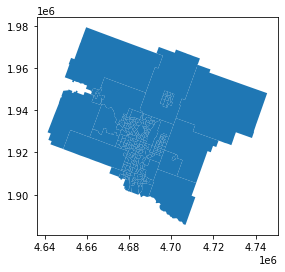

In [5]:
cal_ct.plot()

In [6]:
columns = ['CTUID','Condo','Freehold','Rental','Total']
apt_starts=pd.read_excel('starts_geo/Apt_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
apt_starts = apt_starts[1:-2]

C:\Users\mmak\AppData\Local\Continuum\anaconda3\envs\geo_env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
apt_starts['CTUID']=apt_starts['CTUID'].map('{:.2f}'.format)
apt_starts['CTUID']=apt_starts['CTUID'].astype(str)

In [8]:
merged_starts = cal_ct.merge(apt_starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')

In [9]:
pd.concat([cal_ct.merge(apt_starts,on='CTUID')['CTUID'],apt_starts['CTUID']]).drop_duplicates(keep=False)

10     8259000.01
49     8259011.00
67     8259009.00
72     8259006.01
73     8259013.01
106    8259008.00
107    8259012.00
Name: CTUID, dtype: object

In [10]:
apt_starts

,CTUID,Condo,Freehold,Rental,Total
1,8250002.21,1588,NaN,493,2081
2,8250044.00,513,NaN,716,1229
3,8250038.31,606,NaN,301,907
4,8250077.29,581,NaN,203,784
5,8250031.00,697,NaN,78,775
...,...,...,...,...,...
103,8250200.06,NaN,NaN,1,1
104,8250201.02,NaN,NaN,1,1
105,8250204.05,NaN,NaN,1,1
106,8259008.00,NaN,NaN,1,1


In [11]:
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

In [12]:
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

SSLError: HTTPSConnectionPool(host='tile.openstreetmap.bzh', port=443): Max retries exceeded with url: /br/11/372/683.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)')))

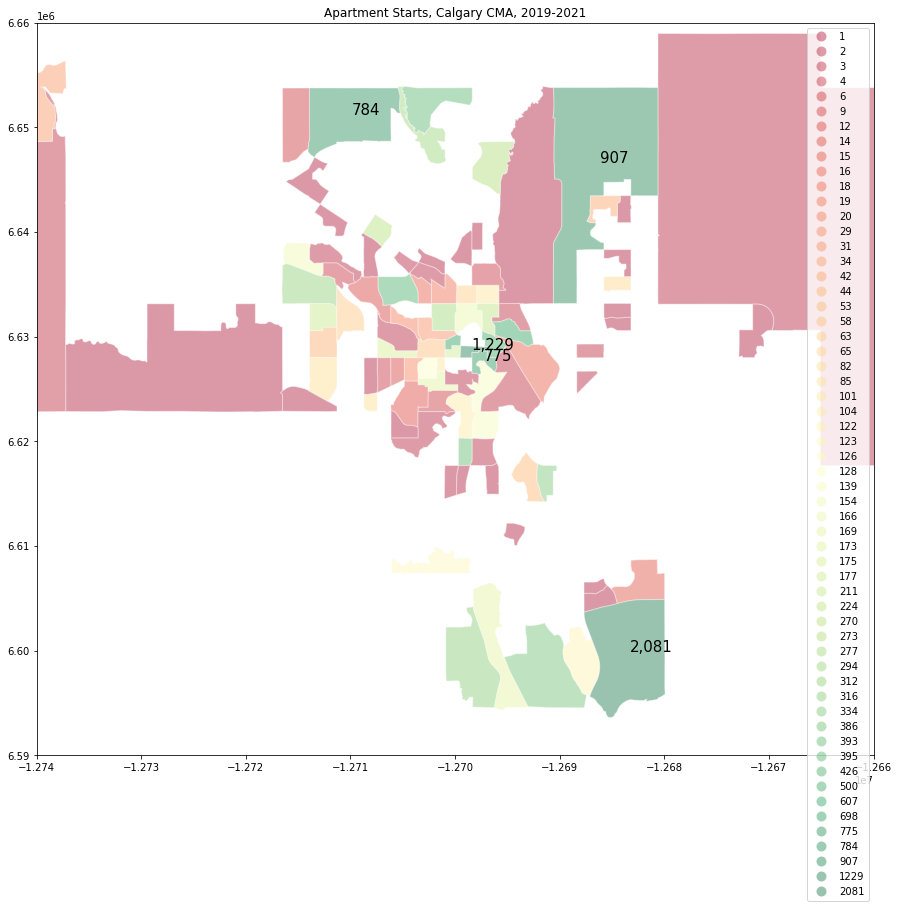

In [18]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Apartment Starts, Calgary CMA, 2019-2021')
merged_starts.to_crs(epsg='3857').plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points",fontsize = 15)
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('apt_starts.png',facecolor='white',transparent=False,dpi=300)

In [125]:
sfd_starts=pd.read_excel('starts_geo/SFD_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
sfd_starts = sfd_starts[1:-2]
sfd_starts['CTUID']=sfd_starts['CTUID'].map('{:.2f}'.format)
sfd_starts['CTUID']=sfd_starts['CTUID'].astype(str)

C:\Users\Maln\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [126]:
merged_starts = cal_ct.merge(sfd_starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

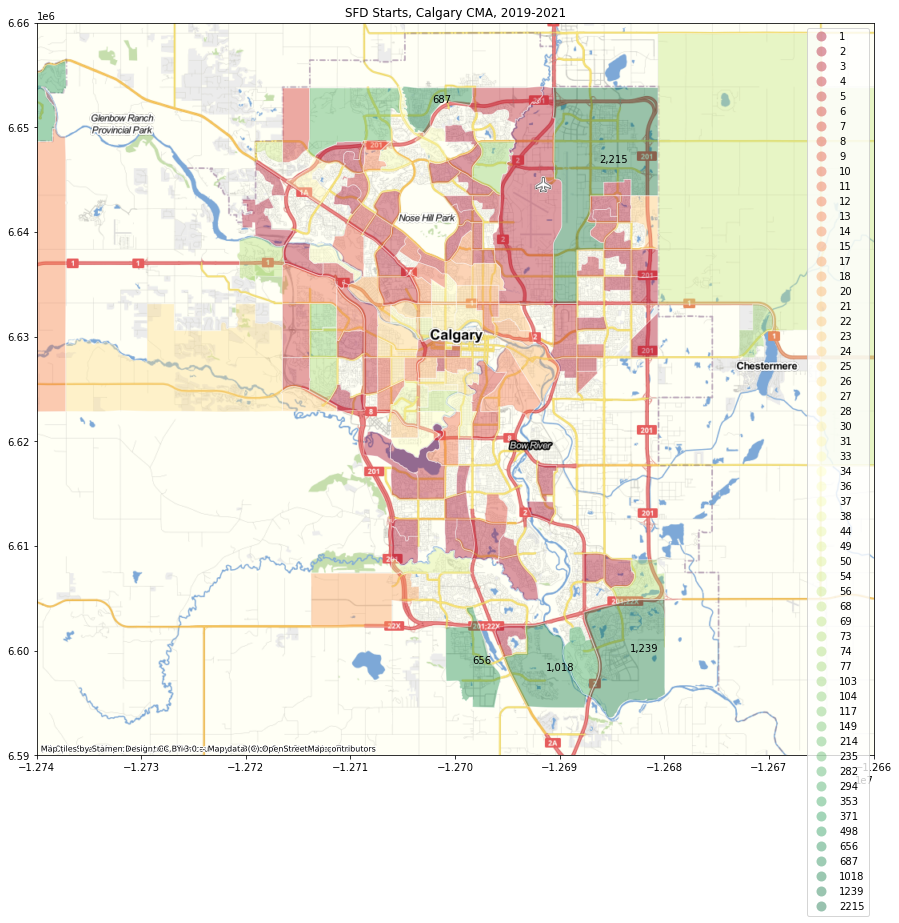

In [127]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('SFD Starts, Calgary CMA, 2019-2021')
merged_starts.plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points")
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('sfd_starts.png',facecolor='white',transparent=False,dpi=300)

In [128]:
starts=pd.read_excel('starts_geo/Row_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
starts = starts[1:-2]
starts['CTUID']=starts['CTUID'].map('{:.2f}'.format)
starts['CTUID']=starts['CTUID'].astype(str)

C:\Users\Maln\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [129]:
merged_starts = cal_ct.merge(starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

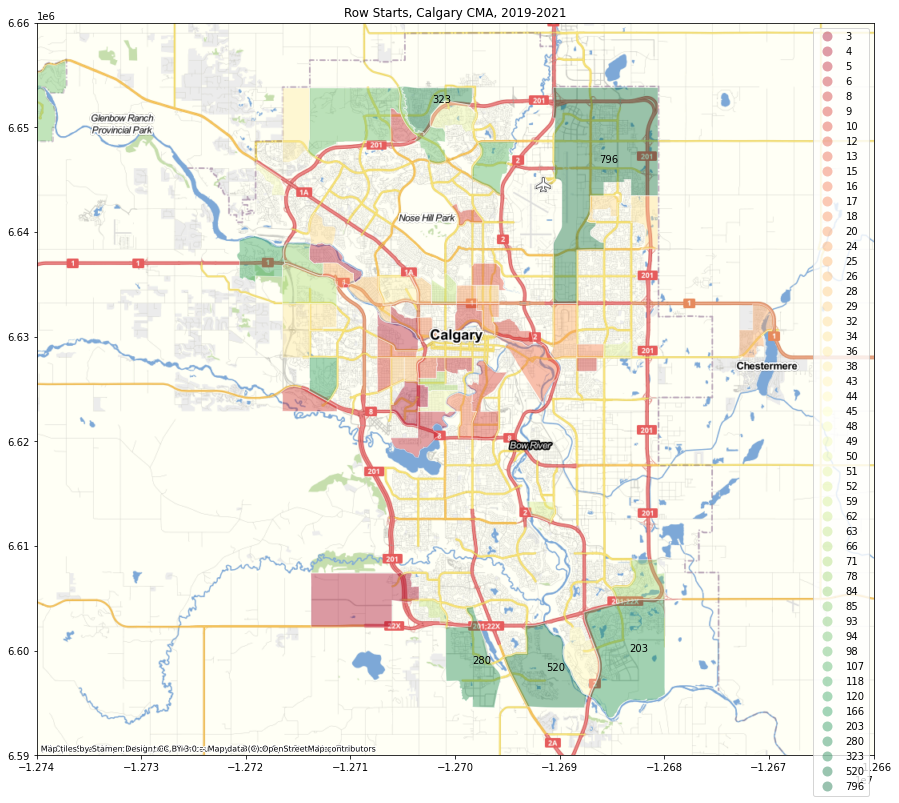

In [130]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Row Starts, Calgary CMA, 2019-2021')
merged_starts.plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points")
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('row_starts.png',facecolor='white',transparent=False,dpi=300)

In [131]:
columns = ['CTUID','Condo','Freehold','Total']

starts=pd.read_excel('starts_geo/Semi_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
starts = starts[1:-2]
starts['CTUID']=starts['CTUID'].map('{:.2f}'.format)
starts['CTUID']=starts['CTUID'].astype(str)
merged_starts = cal_ct.merge(starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

C:\Users\Maln\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


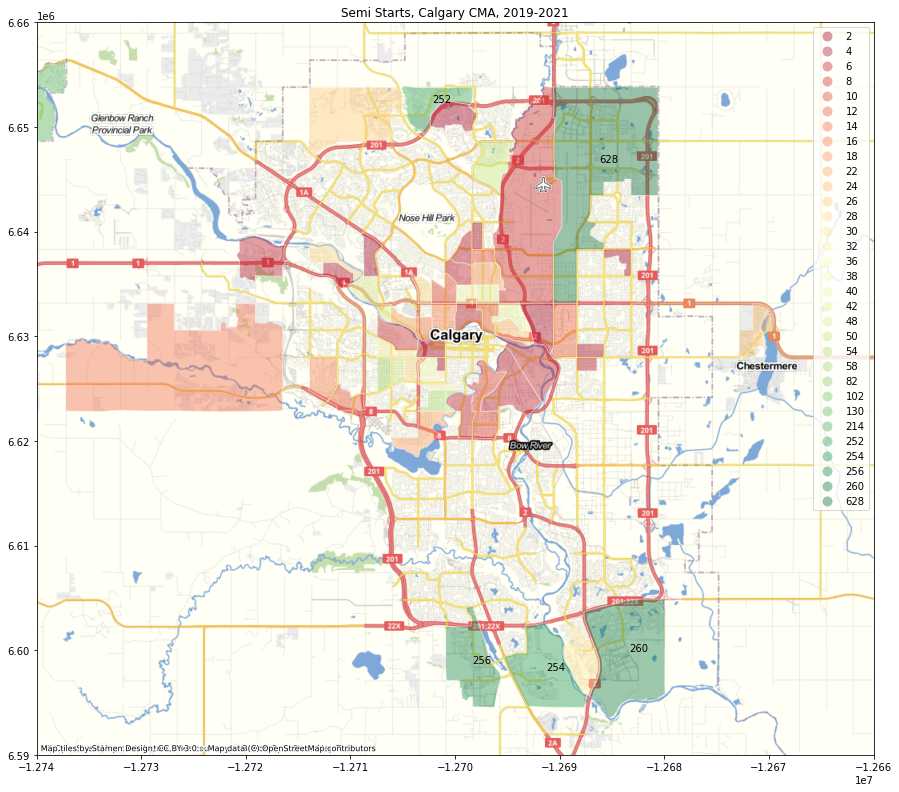

In [132]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Semi Starts, Calgary CMA, 2019-2021')
merged_starts.plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points")
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('semi_starts.png',facecolor='white',transparent=False,dpi=300)